# Stock Market Analysis

Completed the stock market analysis and did the following things:

Analysed 4 diffrent stocks and their correlation and visualized the result.

Analysed risk of the stock using VaR(Value at Risk).

Predicted the future price using Monte Carlo Method with Geometry Brownian Motion.

Basic Analysis of Stock Information

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/Users/suruisun/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


Use Yahoo to get 4 different stock information in the past one year.

In [4]:
# The four stocks we'll use
tech_list = ['LGF','JPM','INTC','WFC']

# Set up End and Start times
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

Let's have a close look at JPM.

In [5]:
# Summary Stats
JPM.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,62.481548,63.015278,61.938373,62.504960,16232758.730159,61.690721
std,3.270759,3.189475,3.360942,3.273054,6600792.449073,3.316496
min,53.900002,53.910000,52.500000,53.070000,4052500.000000,52.273049
25%,59.882500,60.357501,59.162500,59.922499,11866575.000000,58.954779
50%,62.764999,63.450001,62.235000,62.684999,14491850.000000,61.877505
75%,65.222500,65.772501,64.919998,65.437500,18981475.000000,64.453608
max,68.699997,69.029999,68.099998,68.459999,44334700.000000,67.500000


In [6]:
JPM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-09-08 to 2016-09-06
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Plot out the volume and closing price of the stocks.

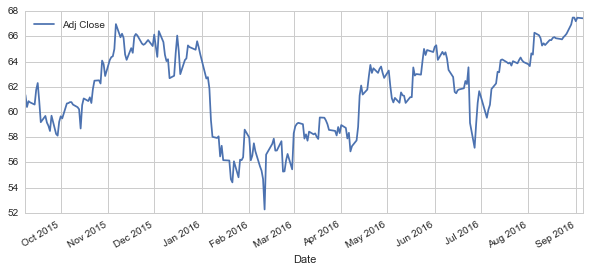

In [7]:
# A historical view of the closing price
JPM['Adj Close'].plot(legend=True,figsize=(10,4))

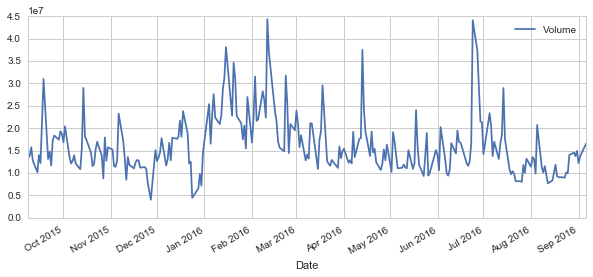

In [8]:
# The total volume of stock being traded each day over the past 1 years
JPM['Volume'].plot(legend=True,figsize=(10,4))

After plotting the closing price and volumn for a given stock, I calculated the moving average.

In [9]:
# several moving averages
ma_day = [10,20,40]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    JPM[column_name]=pd.rolling_mean(JPM['Adj Close'],ma)

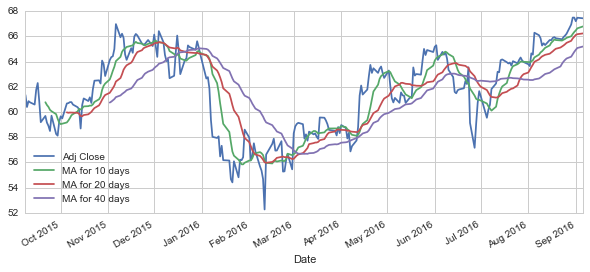

In [10]:
JPM[['Adj Close','MA for 10 days','MA for 20 days','MA for 40 days']].plot(subplots=False,figsize=(10,4))

It is obvious 40 days moving average curve are more smooth than 10 or 20 days moving average curve.

Daily Return Analysis

Take JPM as Example.

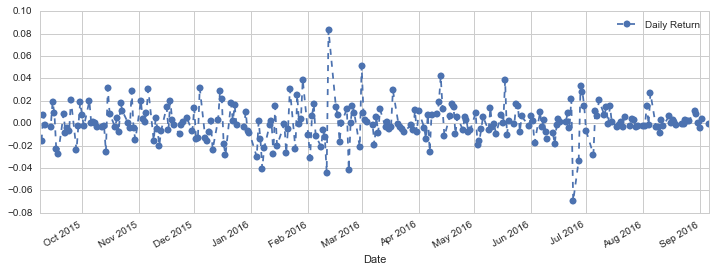

In [12]:
# We'll use pct_change to find the percent change for each day
JPM['Daily Return'] = JPM['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
JPM['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Now look at the average daily return using a histogram.

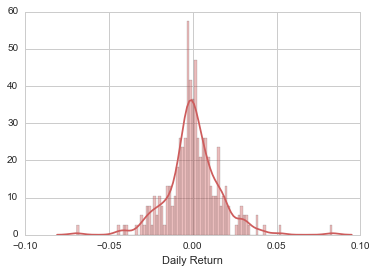

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(JPM['Daily Return'].dropna(),bins=100,color='indianred')

Now we wanted to analyze the returns of all the stocks in our list.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['LGF','JPM','INTC','WFC'],'yahoo',start,end)['Adj Close']

In [16]:
# Let's take a quick PREVIEW
closing_df.head()

,INTC,JPM,LGF,WFC
Date,,,,
2015-09-08,28.572799,61.354273,38.366893,51.356078
2015-09-09,28.320971,60.402291,37.804705,50.638081
2015-09-10,28.350028,60.868568,37.735660,50.997081
2015-09-11,28.543741,60.771428,37.814566,51.055295
2015-09-14,28.466256,60.596574,37.410185,51.200836


In [17]:
tech_rets = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated.

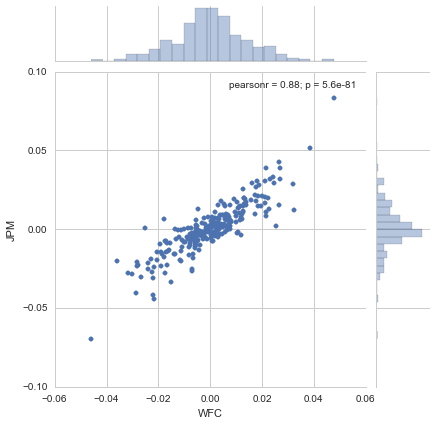

In [20]:
# Use joinplot to compare the daily returns of WFC and JPM
sns.jointplot('WFC','JPM',tech_rets,kind='scatter')

The correlation coefficient is 0.88, which shows strong positive correlation between these two stocks.

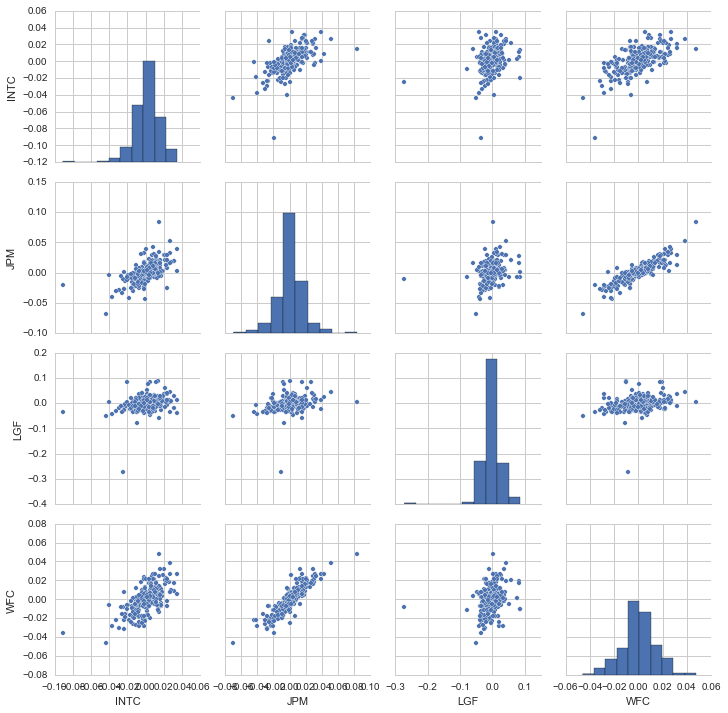

In [19]:
# Call pairplot for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

A quick glance shows positive correlation between JPM and WFC daily returns are rather high. Perhaps it is because they both belong to the financial industry, while the other two did not.


we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

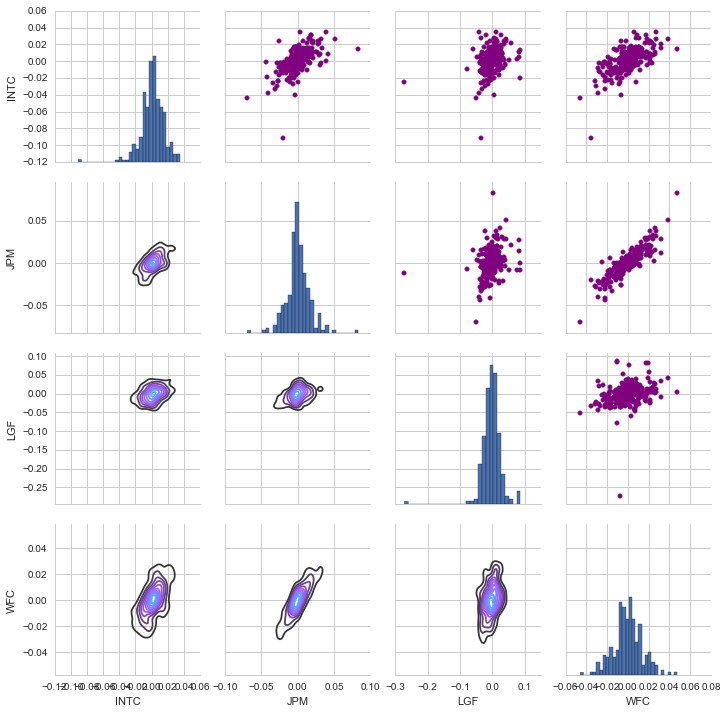

In [21]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. 

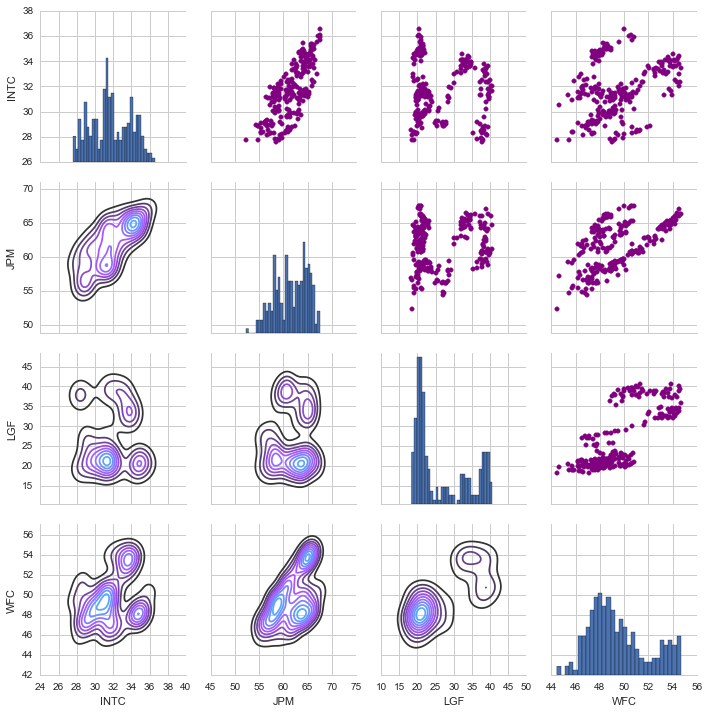

In [22]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Finally draw a correlation plot with actual numerical values for the correlation between the stocks' daily return values.

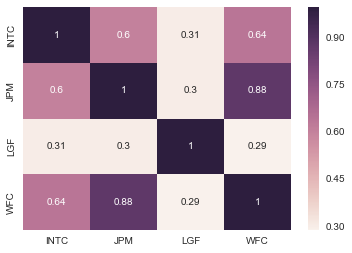

In [24]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

Just like we suspected in our PairPlot, we see here that WFC and JPM had the strongest correlation of daily stock return. 


Next step is for actual risk analysis.

One of the most basic ways to quantify risk was to compare the expected return with the standard deviation of the daily returns.

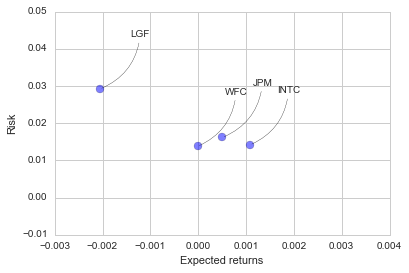

In [28]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# label
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

It seems that INTC is the best choice if we can only choose 1 stock. As it has the highest expected returns and lowest risk.

Value at Risk

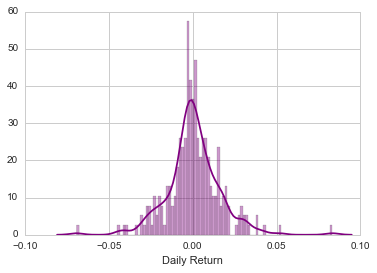

In [30]:
# Again JPM as example
sns.distplot(JPM['Daily Return'].dropna(),bins=100,color='purple')

In [31]:
# The 0.05 empirical quantile of daily returns
rets['JPM'].quantile(0.05)

-0.025340539138759277

It means that with 95% confidence, our worst daily loss will not exceed 2.5%.

Value at Risk using the Monte Carlo method with geometric Brownian motion (GBM)

In [33]:
# Prediction time length
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for JPM
mu = rets.mean()['JPM']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['JPM']

Next, we will create a function that takes in the starting price and number of days, and uses sigma and mu we already calculated form out daily returns.

In [34]:
def stock_monte_carlo(start_price,days,mu,sigma):
#This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [35]:
JPM.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 40 days,Daily Return
Date,,,,,,,,,,
2015-09-08,62.770000,63.200001,62.330002,63.160000,13385100,61.354273,NaN,NaN,NaN,NaN
2015-09-09,63.939999,64.339996,62.000000,62.180000,13889500,60.402291,NaN,NaN,NaN,-0.015516
2015-09-10,61.860001,63.000000,61.450001,62.660000,15751100,60.868568,NaN,NaN,NaN,0.007720
2015-09-11,62.380001,62.660000,61.990002,62.560001,12766700,60.771428,NaN,NaN,NaN,-0.001596
2015-09-14,62.639999,62.689999,62.119999,62.380001,10202800,60.596574,NaN,NaN,NaN,-0.002877


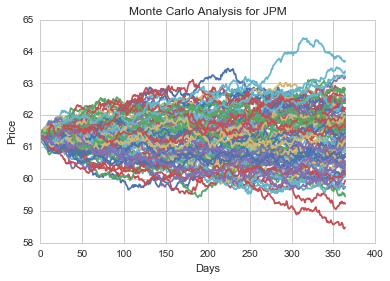

In [36]:
# Get start price from JPM.head()
start_price = 61.35

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for JPM')

Let's get a histogram to have a more clear view.

In [37]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

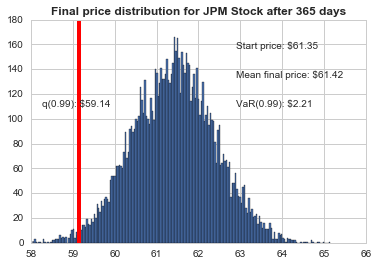

In [39]:
# Now we'lll define q as the 1% empirical qunatile
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for JPM Stock after %s days" % days, weight='bold');

Use the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the JPM stock, which looks to be $2.21 for every investment of 61.35 (the inital price for JPM stock).

This basically menas for every initial stock you purchase your putting about $2.21 at risk 99% of the time from our Monte Carlo Simulation.